In [1]:
import xarray as xp

In [3]:
ds=xp.open_dataset("INSAT3DR_Stacked.nc4")

print(ds)

<xarray.Dataset> Size: 7GB
Dimensions:  (time: 38, band: 5, lat: 3207, lon: 3062)
Coordinates:
  * time     (time) datetime64[ns] 304B 2025-06-25 ... 2025-06-25T18:30:00
  * band     (band) <U4 80B 'WV' 'VIS' 'SWIR' 'TIR1' 'TIR2'
  * lat      (lat) float64 26kB 6.414e+06 6.41e+06 ... -6.406e+06 -6.41e+06
  * lon      (lon) float64 24kB -6.123e+06 -6.119e+06 ... 6.115e+06 6.119e+06
Data variables:
    BT       (time, band, lat, lon) float32 7GB ...
Attributes:
    title:        INSAT-3DR Brightness Temperature Dataset
    description:  Stacked BT values from cleaned and georeferenced GeoTIFFs
    institution:  Bharatiya Antariksh Hackathon 2025
    source:       INSAT-3DR VHRR Radiance Converted to BT


In [24]:
data=ds['BT']
band_map={'WV':0,'VIS':1,'SWIR':2,'TIR1':3,'TIR2':4}
band_names=list(band_map.keys())

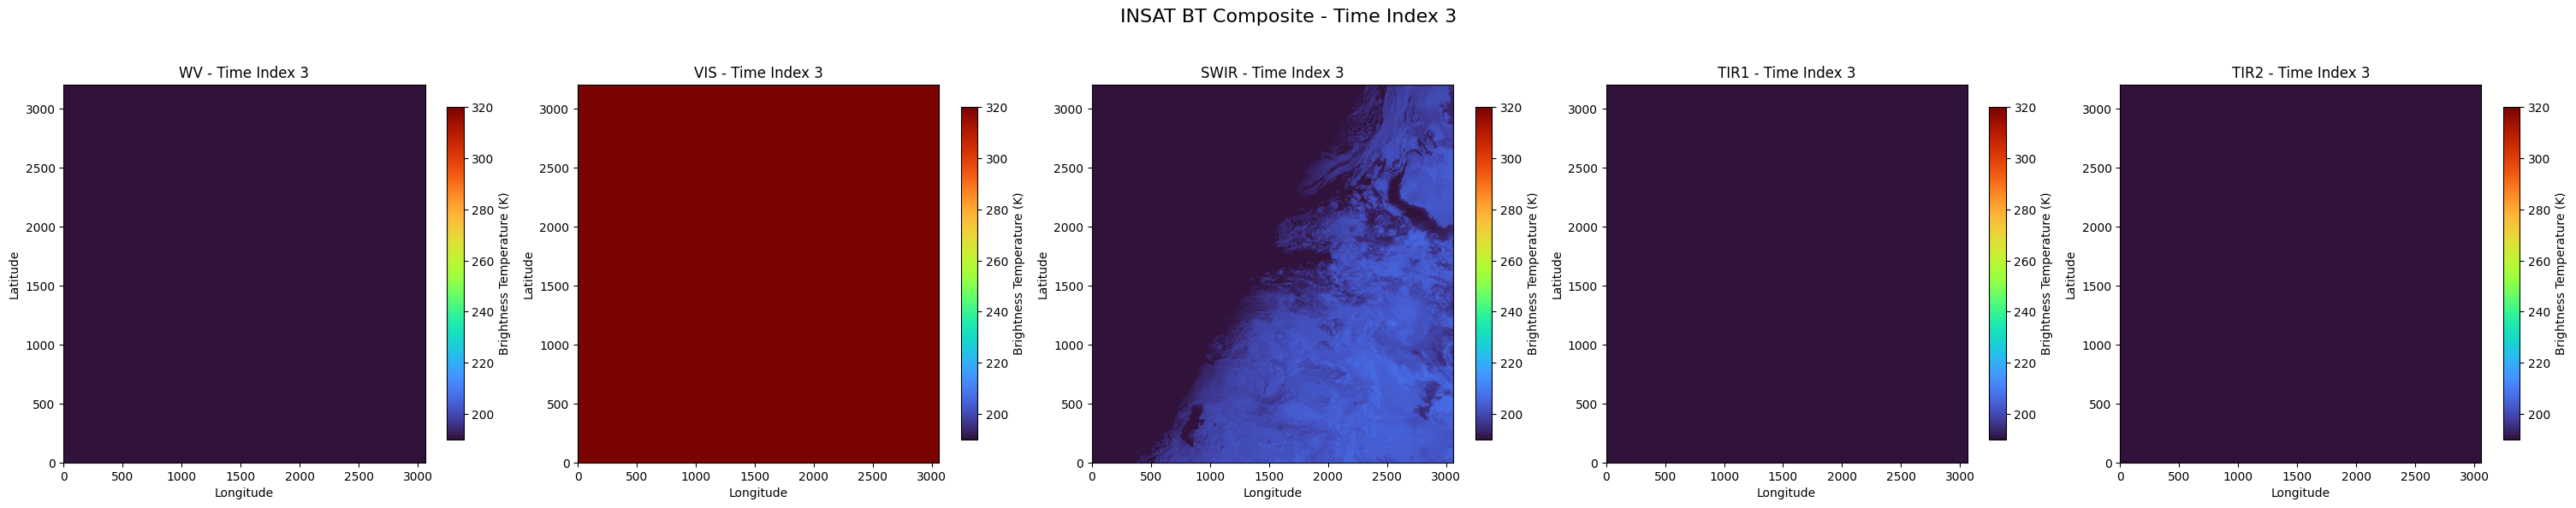

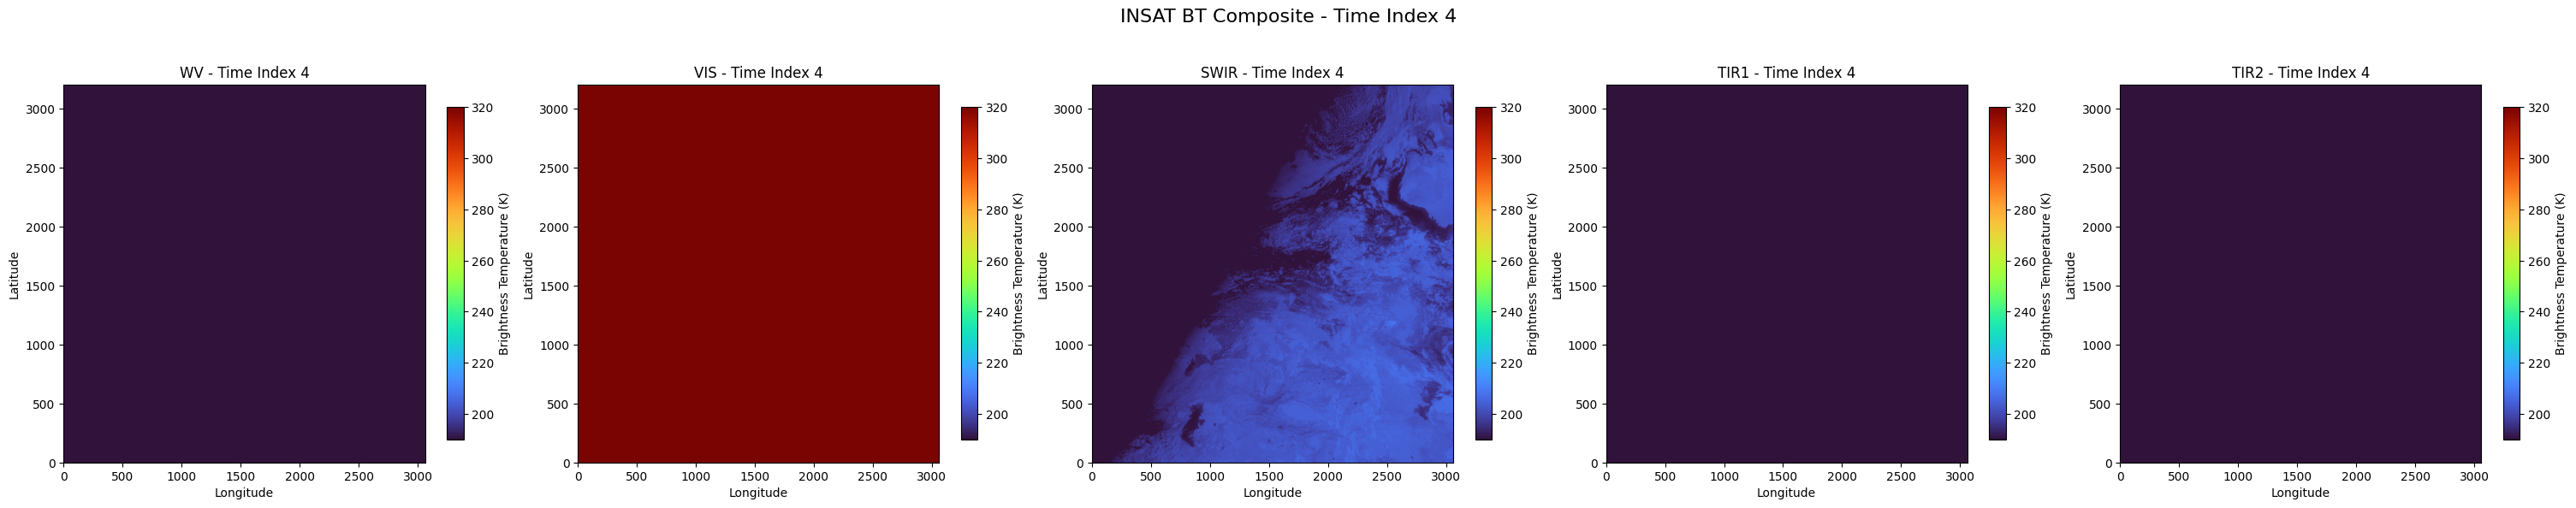

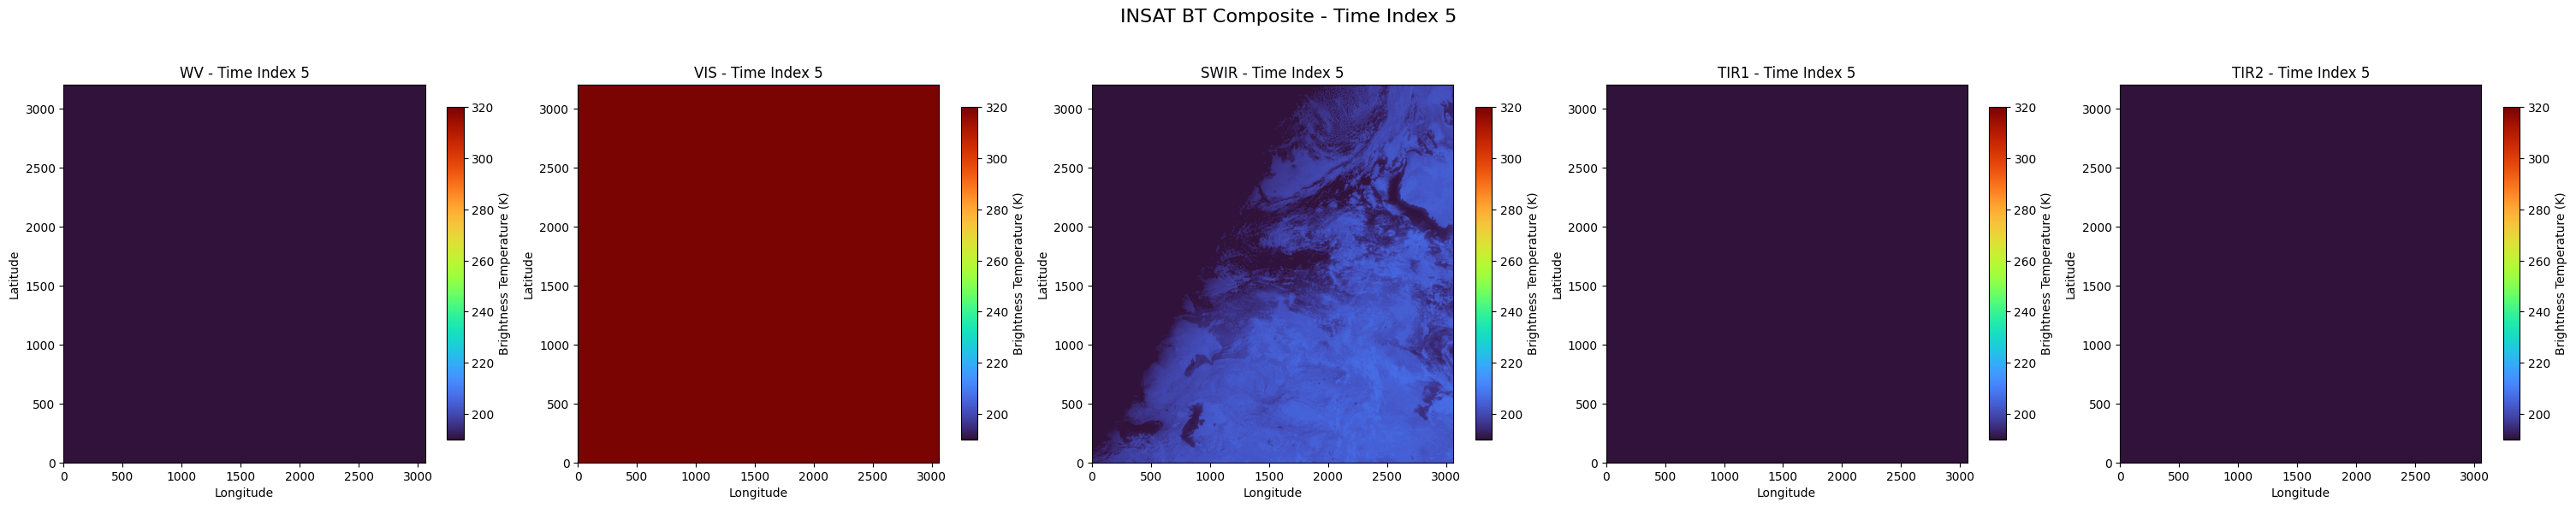

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
#Timescales to plot
time_scales = [3,4,5]

for t in time_scales:
    fig, axes = plt.subplots(1, len(band_names), figsize=(6 * len(band_names), 6), constrained_layout=True)

    for i, band in enumerate(band_names):
        bt_data = data[t, band_map[band], :, :]
        ax = axes[i]
        img = ax.imshow(bt_data, cmap='turbo', origin='lower',
                        vmin=190, vmax=320)
        ax.set_title(f"{band} - Time Index {t}")
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
        cbar.set_label("Brightness Temperature (K)")

    plt.suptitle(f"INSAT BT Composite - Time Index {t}", fontsize=16)
    plt.savefig(f"insat_bt_time_{t:02d}.png", dpi=300)
    plt.show()